# Import libraries

In [ ]:
import cdtools

In [1]:
from warnings import simplefilter # import warnings filter
simplefilter(action='ignore', category=FutureWarning) # ignore all future warnings

from cdtools.CD_tools import CDML, compare_binary_columns, df_2_xlsx, df_balance, high_correlation_filter, PCA_analyse, voting_classifier, zero_variance_columns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold

# Options

In [2]:
%matplotlib inline
pd.options.display.max_columns = None
plt.rcParams['figure.figsize'] = [16, 8]

# Read and prepare the Titanic dataset

In [4]:
df_titanic = pd.read_excel('../data/input/titanic/titanic.xls',header=0)
df_titanic = df_titanic.reset_index().rename(columns={'index': 'PassengerId','pclass': 'Pclass','survived': 'Survived','sex': 'Sex','sibsp': 'SibSp','parch': 'Parch','fare': 'Fare'})
df_titanic.fillna(0,inplace=True)

keys = ['PassengerId']
features = ['Pclass', 'Sex','SibSp', 'Parch','Fare']
features_categorical = ['Pclass', 'Sex']
features_categorical_classes_2_drop = [3,'male']
label = ['Survived']

df_titanic = df_titanic[keys+features+label]

# Build a classification model with default settings

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

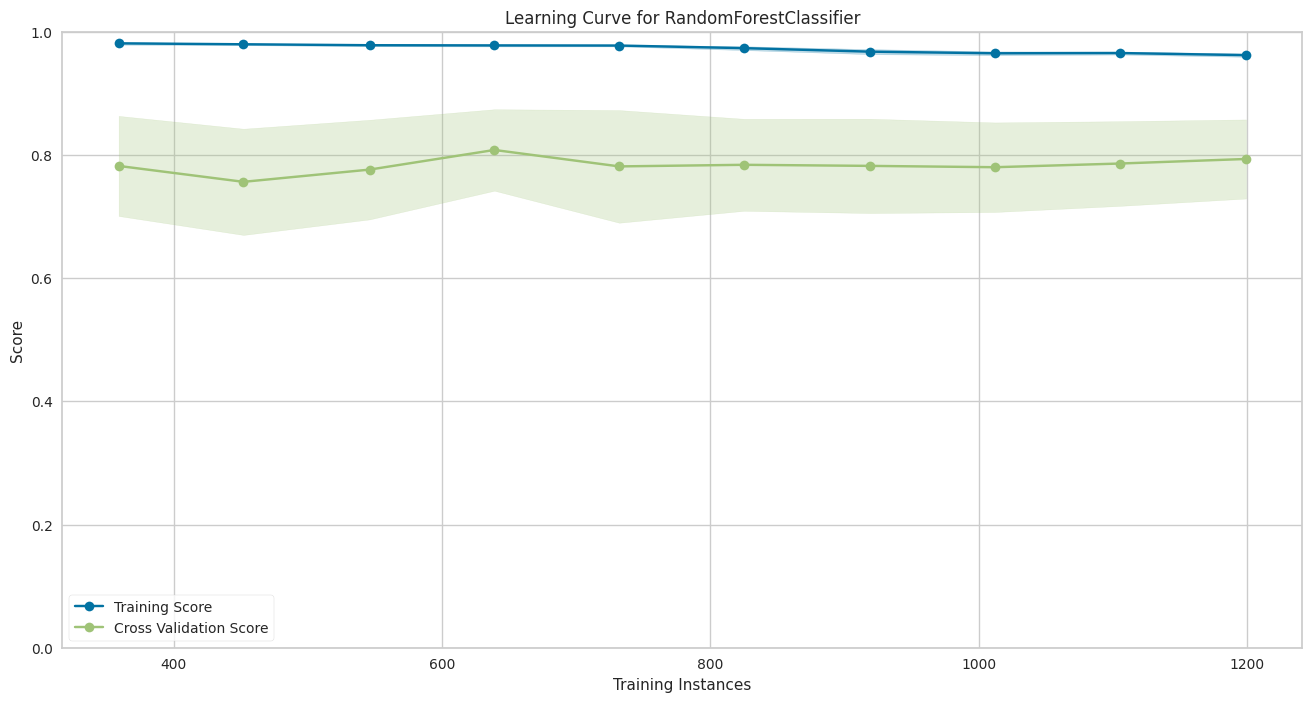

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

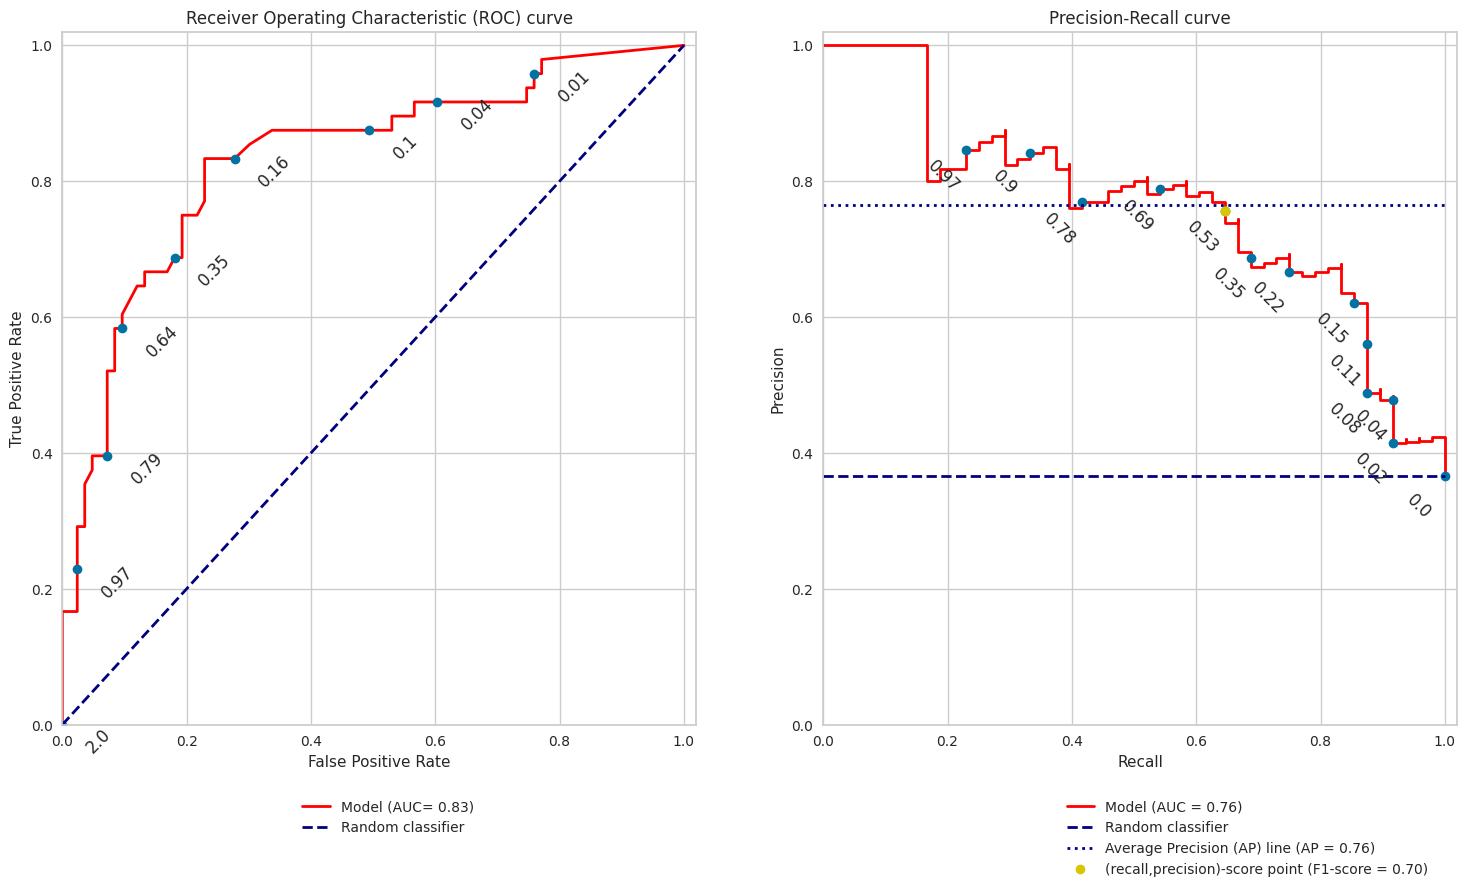

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

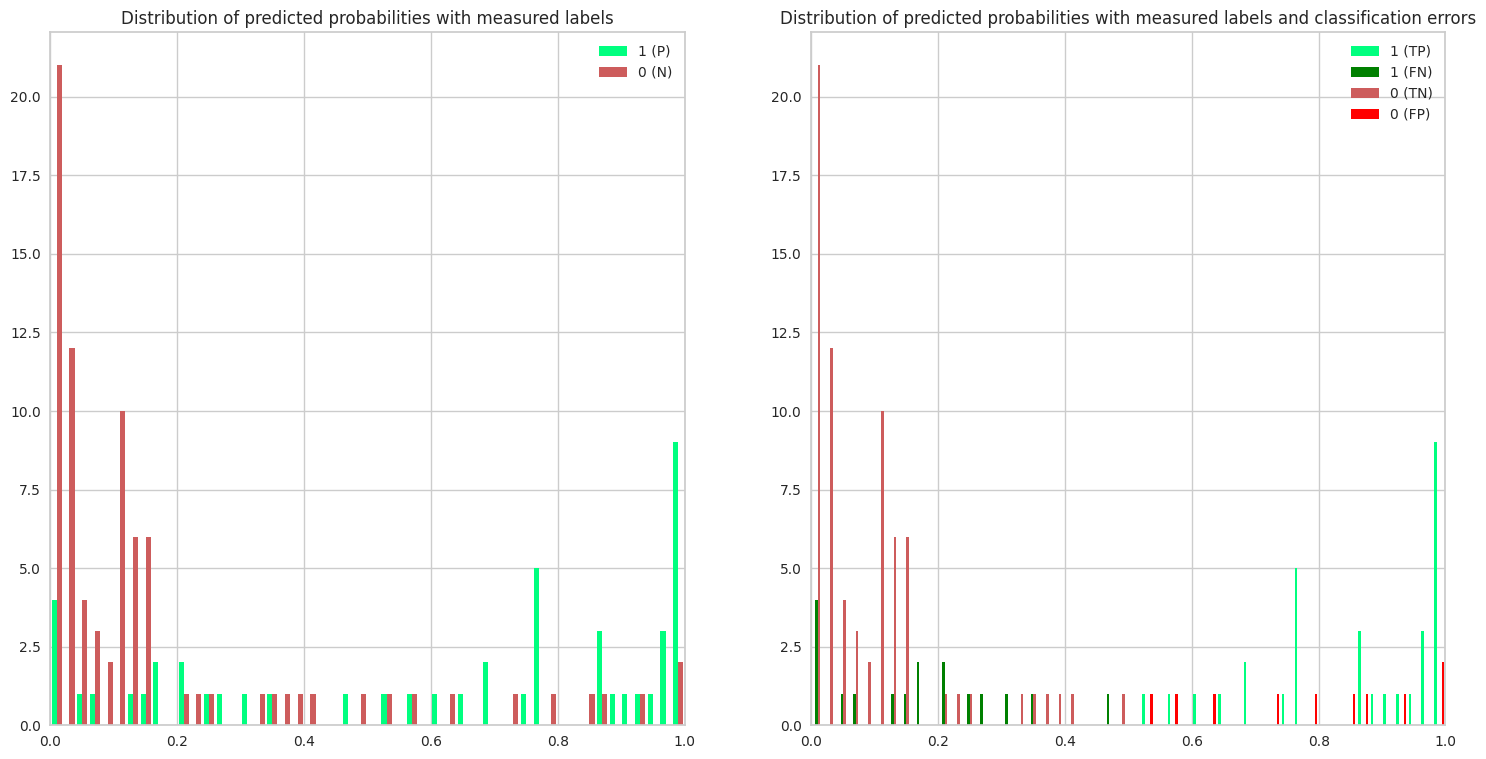

Note: Model features are sorted by importance for the model!
Features with zero importance for the model:  []


/home/rien/anaconda3/envs/data-science-tools/lib/python3.9/site-packages/pandas/io/formats/style.py:4187: RuntimeWarning: invalid value encountered in double_scalars
  start, end = z_frac, (x - left) / (right - left)


,PassengerId,Survived,prediction,bias,Fare,Fare (contribution),Sex female,Sex female (contribution),Parch,Parch (contribution),SibSp,SibSp (contribution),Pclass 1,Pclass 1 (contribution),Pclass 2,Pclass 2 (contribution)
index,,,,,,,,,,,,,,,,
198,198,1,1.000000,0.385586,53.100000,0.161719,1.000000,0.305842,0.000000,0.005892,1.000000,0.026354,1.000000,0.118058,0.000000,-0.003452
161,161,1,1.000000,0.385586,77.958300,0.185973,1.000000,0.299021,0.000000,0.003567,1.000000,0.017537,1.000000,0.110103,0.000000,-0.001787
159,159,1,1.000000,0.385586,57.979200,0.149590,1.000000,0.261984,1.000000,0.063778,0.000000,0.021181,1.000000,0.123457,0.000000,-0.005577
18,18,1,1.000000,0.385586,76.291700,0.181098,1.000000,0.317830,0.000000,-0.001166,0.000000,0.008713,1.000000,0.110256,0.000000,-0.002317
108,108,1,1.000000,0.385586,110.883300,0.200078,1.000000,0.301080,0.000000,-0.002075,0.000000,0.009157,1.000000,0.108491,0.000000,-0.002317


,PassengerId,Survived,prediction,intercept,Fare,Fare (contribution),Fare (decision),Parch,Parch (contribution),Parch (decision),Pclass,Pclass (contribution),Pclass (decision),Sex,Sex (contribution),Sex (decision),SibSp,SibSp (contribution),SibSp (decision)
index,,,,,,,,,,,,,,,,,,,
1139,1139,0,0.06848,0.795109,7.8958,-0.089862,Fare <= 7.90,0,-0.128361,Parch <= 0.00,3,-0.073246,Pclass=3,male,-0.426149,Sex=male,0,-0.009011,SibSp <= 0.00
533,533,1,0.766887,0.168014,21.0,0.01428,14.45 < Fare <= 31.27,1,0.109773,Parch > 0.00,2,0.01473,Pclass=2,female,0.464353,Sex=female,0,-0.004264,SibSp <= 0.00
459,459,0,0.197241,0.736082,27.0,0.016306,14.45 < Fare <= 31.27,0,-0.123042,Parch <= 0.00,2,-0.017101,Pclass=2,male,-0.454197,Sex=male,1,0.039192,0.00 < SibSp <= 1.00
1150,1150,0,0.141736,0.757366,14.5,-0.006585,14.45 < Fare <= 31.27,0,-0.114421,Parch <= 0.00,3,-0.074399,Pclass=3,male,-0.415617,Sex=male,0,-0.004609,SibSp <= 0.00
393,393,0,0.205216,0.722848,31.5,0.073623,Fare > 31.27,0,-0.116563,Parch <= 0.00,2,-0.020766,Pclass=2,male,-0.444185,Sex=male,0,-0.009741,SibSp <= 0.00


In [5]:
rc = CDML(df_titanic,keys,features,label[0],features_categorical=features_categorical,features_categorical_classes_2_drop=features_categorical_classes_2_drop)
rc.split_data(test_size=0.1,random_state=0,sampling=None)
rc.classification_model_data("RandomForestClassifier(random_state=0,n_estimators=100)",threshold=0.5)
rc.show_learning_curve(ylim=(0,1),cv=StratifiedKFold(12),n_jobs=4,train_sizes=np.linspace(0.3,1.0,10),scoring='roc_auc')
rc.classification_show_ROC_precision_recall_curves(show_labels='Y',label_interval=6,label_offsets_ROC=[15,-20],label_offsets_PR=[-30,-30])
rc.classification_show_prediction_distributions(nrbins=51)
rc.save_feature_importance()
rc.classification_show_interpretation_table(sort_columns='Y',top=5)
rc.classification_transpose_interpretation_table()
rc.classification_show_interpretation_table_LIME(top=5,num_samples=5000)
rc.classification_transpose_interpretation_table_LIME()

# Optimize the classification model using hyperparameter tuning

Best estimator:
RandomForestClassifier(max_features=None, min_samples_split=100,
                       n_estimators=50, n_jobs=-1, random_state=0)



findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

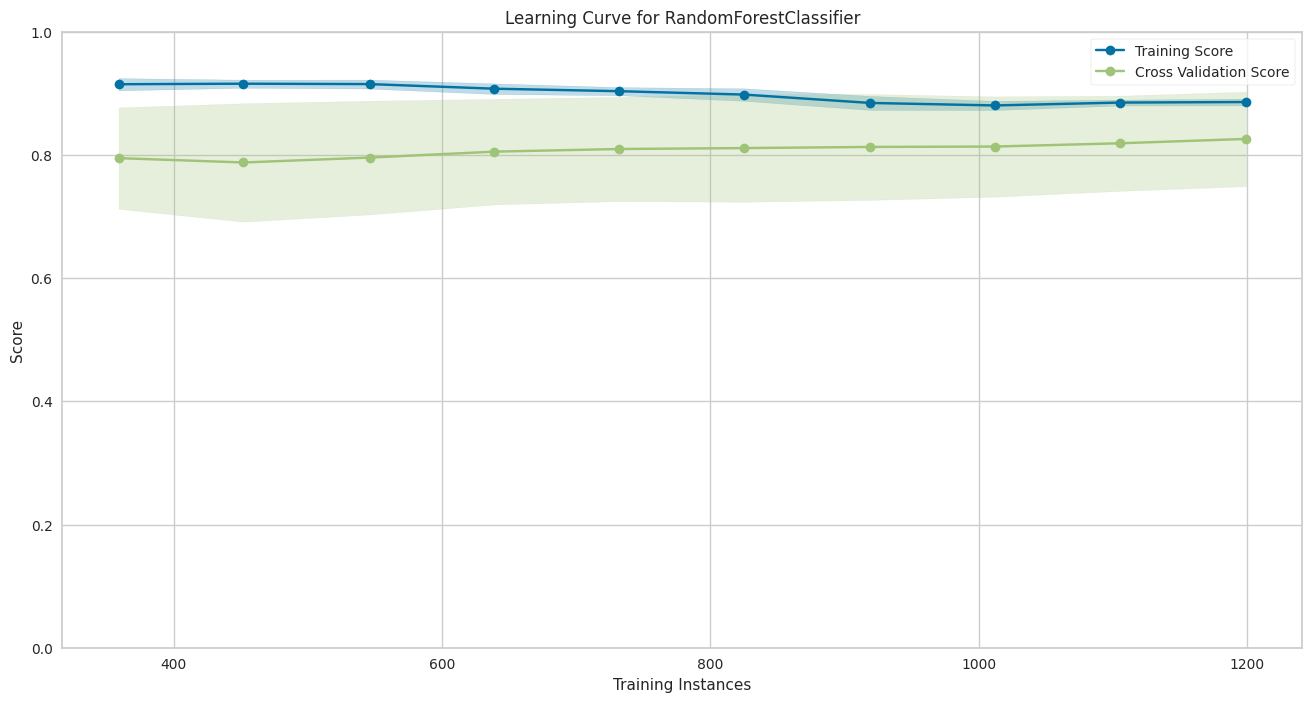

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

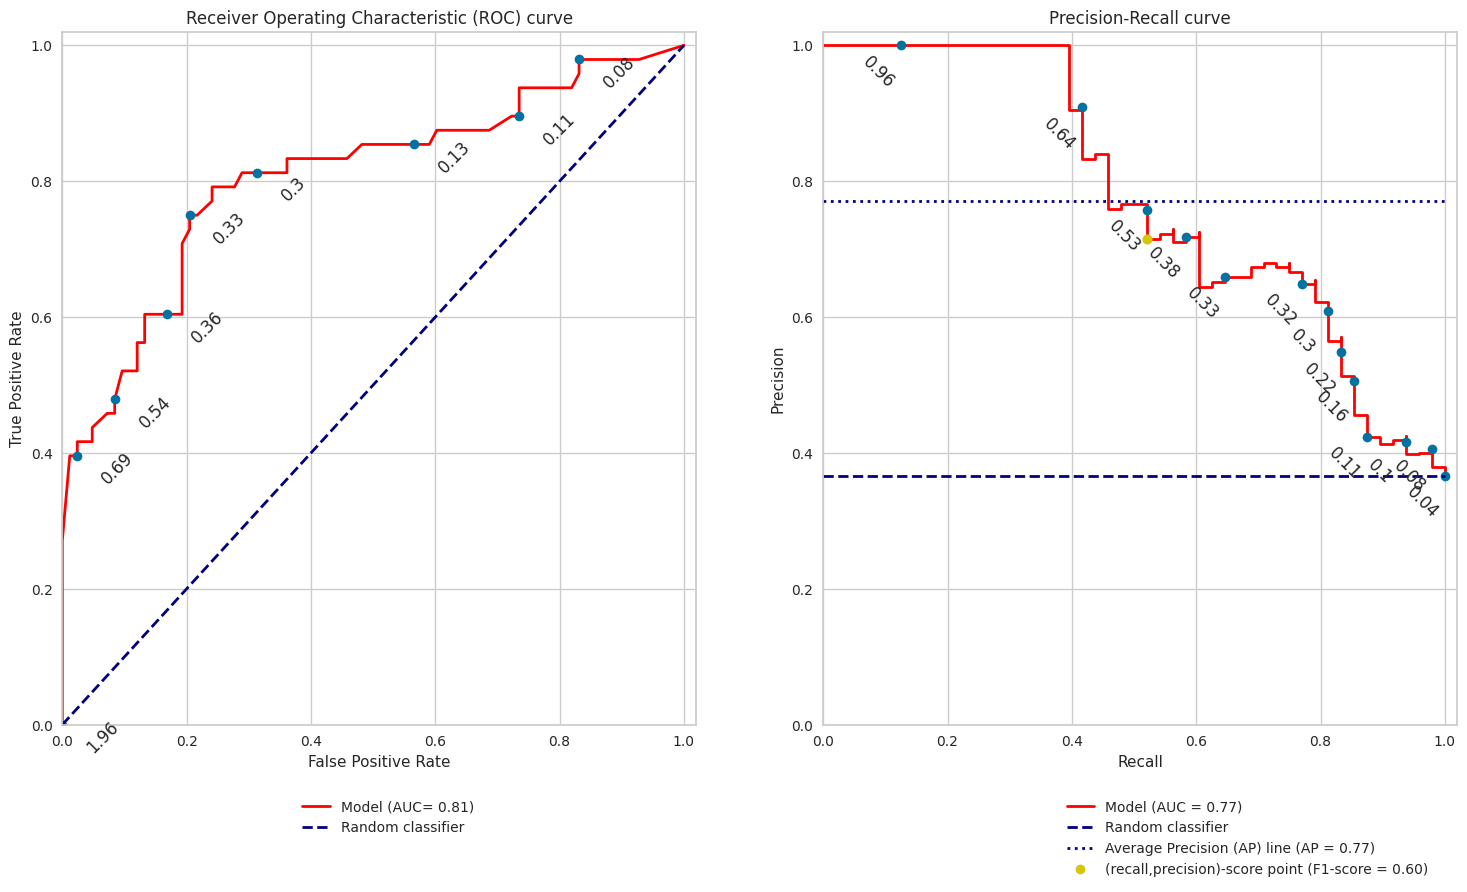

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

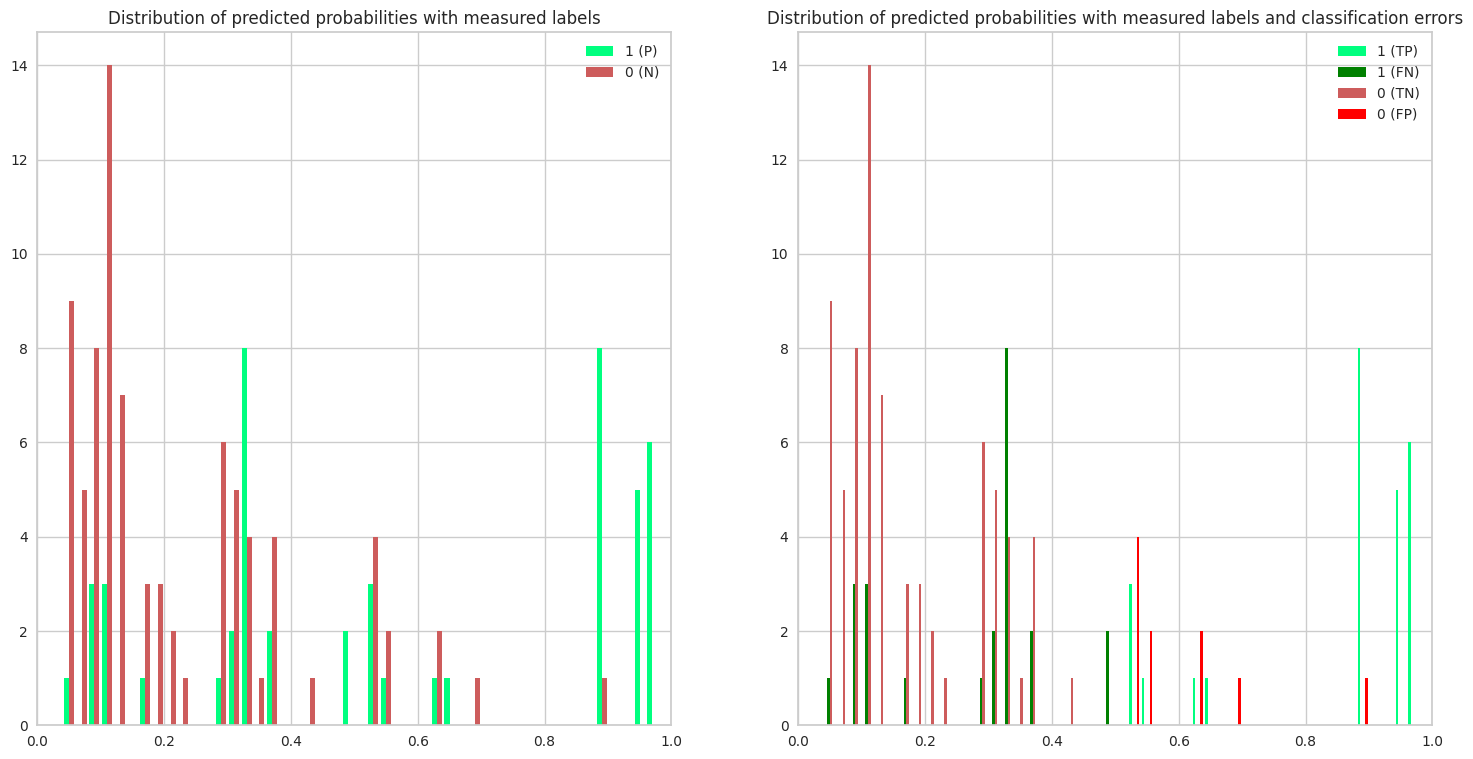

/home/rien/anaconda3/envs/data-science-tools/lib/python3.9/site-packages/pandas/io/formats/style.py:4187: RuntimeWarning: invalid value encountered in double_scalars
  start, end = z_frac, (x - left) / (right - left)


Note: Model features are sorted by importance for the model!
Features with zero importance for the model:  []


,PassengerId,Survived,prediction,bias,Sex female,Sex female (contribution),Fare,Fare (contribution),Pclass 1,Pclass 1 (contribution),Pclass 2,Pclass 2 (contribution),Parch,Parch (contribution),SibSp,SibSp (contribution)
index,,,,,,,,,,,,,,,,
108,108,1,0.961348,0.385857,1.000000,0.346743,110.883300,0.011477,1.000000,0.214320,0.000000,0.000000,0.000000,0.000223,0.000000,0.002727
18,18,1,0.961348,0.385857,1.000000,0.346743,76.291700,0.011477,1.000000,0.214320,0.000000,0.000000,0.000000,0.000223,0.000000,0.002727
159,159,1,0.961348,0.385857,1.000000,0.346743,57.979200,0.011477,1.000000,0.214320,0.000000,0.000000,1.000000,0.000223,0.000000,0.002727
141,141,1,0.961348,0.385857,1.000000,0.346743,63.358300,0.011477,1.000000,0.214320,0.000000,0.000000,1.000000,0.000223,0.000000,0.002727
233,233,1,0.961348,0.385857,1.000000,0.346743,83.158300,0.011477,1.000000,0.214320,0.000000,0.000000,1.000000,0.000223,0.000000,0.002727


,PassengerId,Survived,prediction,intercept,Fare,Fare (contribution),Fare (decision),Parch,Parch (contribution),Parch (decision),Pclass,Pclass (contribution),Pclass (decision),Sex,Sex (contribution),Sex (decision),SibSp,SibSp (contribution),SibSp (decision)
index,,,,,,,,,,,,,,,,,,,
1139,1139,0,0.11819,0.807571,7.8958,0.000771,Fare <= 7.90,0,-0.089061,Parch <= 0.00,3,-0.183687,Pclass=3,male,-0.417125,Sex=male,0,-0.000278,SibSp <= 0.00
533,533,1,0.786223,0.19152,21.0,-0.018475,14.45 < Fare <= 31.27,1,0.065003,Parch > 0.00,2,0.097405,Pclass=2,female,0.45374,Sex=female,0,-0.00297,SibSp <= 0.00
459,459,0,0.254973,0.705209,27.0,-0.014255,14.45 < Fare <= 31.27,0,-0.076546,Parch <= 0.00,2,0.07742,Pclass=2,male,-0.446762,Sex=male,1,0.009907,0.00 < SibSp <= 1.00
1150,1150,0,0.106663,0.784333,14.5,-0.029953,14.45 < Fare <= 31.27,0,-0.068583,Parch <= 0.00,3,-0.185284,Pclass=3,male,-0.403261,Sex=male,0,0.00941,SibSp <= 0.00
393,393,0,0.293871,0.677725,31.5,0.034803,Fare > 31.27,0,-0.071055,Parch <= 0.00,2,0.079481,Pclass=2,male,-0.430285,Sex=male,0,0.003202,SibSp <= 0.00


In [7]:
# Setup hyperparameter search grid
random_grid = {'n_estimators': [10,50,100,150,200,250,500],
               'criterion': ['gini','entropy','log_loss'],
               'max_depth': [5,10,None],
               'min_samples_split': [2,10,50,100,500],
               'min_samples_leaf': [1,10,50,100,500],
               'min_weight_fraction_leaf': [0.0],
               'max_features': ['sqrt', 'log2', None],
               'max_leaf_nodes': [None],
               'min_impurity_decrease': [0.0],
               'bootstrap': [True],
               'oob_score': [False],
               'n_jobs': [-1],
               'random_state': [0],
               'verbose': [0],
               'warm_start': [False],
               'class_weight': [None],
               'ccp_alpha': [0.0],
               'max_samples': [None]
              }

# Search the hyperparameter grid for the optimal hyperparameters
rc = CDML(df_titanic,keys,features,label[0],features_categorical=features_categorical,features_categorical_classes_2_drop=features_categorical_classes_2_drop)
rc.split_data(test_size=0.1,random_state=0,sampling=None)
rc.classification_model_data("RandomForestClassifier(random_state=0)",threshold=0.5) # Run a model with default settings
rc.RandomizedSearchCV(random_grid,n_iter=100)
best_estimator = rc.model.randomized_search_CV.random_search.best_estimator_
print("Best estimator:")
print(best_estimator)
print()
# Run the model with the optimal hyperparameters
rc.classification_model_data(str(best_estimator),threshold=0.5) # Run the model with the optimal hyperparameters
rc.show_learning_curve(ylim=(0,1),cv=StratifiedKFold(12),n_jobs=4,train_sizes=np.linspace(0.3,1.0,10),scoring='roc_auc')
rc.classification_show_ROC_precision_recall_curves(show_labels='Y',label_interval=6,label_offsets_ROC=[15,-20],label_offsets_PR=[-30,-30])
rc.classification_show_prediction_distributions(nrbins=51)
rc.save_feature_importance()
rc.classification_show_interpretation_table(sort_columns='Y',top=5)
rc.classification_transpose_interpretation_table()
rc.classification_show_interpretation_table_LIME(top=5,num_samples=5000)
rc.classification_transpose_interpretation_table_LIME()